# Нелинейная задача теплопроводности для стержня (вариант m = 2, n = 2)

Ноутбук содержит:

* постановку исходной нелинейной задачи;
* аналитическое решение линейной модельной задачи;
* численное решение модельной задачи;
* численное решение исходной нелинейной задачи;
* сравнение результатов и дополнительные графики.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры варианта m = 2, n = 2
l = 1.0
l1 = 0.5
l2 = 1.0

a = 1.0
b = 1.0
sigma = 1.0

rho = 2.0
c = 0.25

mu = 0.5   # фоновая температура
nu = 2.0   # повышенная температура

# Для модельной задачи k(u) = a = const, уравнение u_t = kappa_linear * u_xx
kappa_linear = a / (c * rho)
print("kappa_linear =", kappa_linear)

kappa_linear = 2.0


## 1. Постановка исходной нелинейной задачи

Рассматривается тонкий стержень длины $l = 1$ с теплоизолированной боковой поверхностью.
Температура $u(x,t)$ удовлетворяет нелинейному уравнению

$$
u_t = 2\,\frac{\partial}{\partial x}\big((1+u)\,u_x\big), \quad 0 < x < 1,\ t>0.
$$

Начальное условие (разрывное):

$$
u(x,0) =
\begin{cases}
0.5, & 0 \le x < 0.5,\\
2,   & 0.5 \le x \le 1.
\end{cases}
$$

Граничные условия для варианта $n = 2$:

* на левом конце $x = 0$ тепловой поток равен нулю, то есть $u_x(0,t) = 0$;
* на правом конце $x = 1$ задана постоянная температура $u(1,t) = 0.5$.

Цель — по численному решению определить время $T$, при котором распределение температуры по стержню становится
практически постоянным, в смысле критерия

$$
\delta(t) = \frac{\max_x u(x,t) - \min_x u(x,t)}{\min_x u(x,t)} \le 0.05.
$$

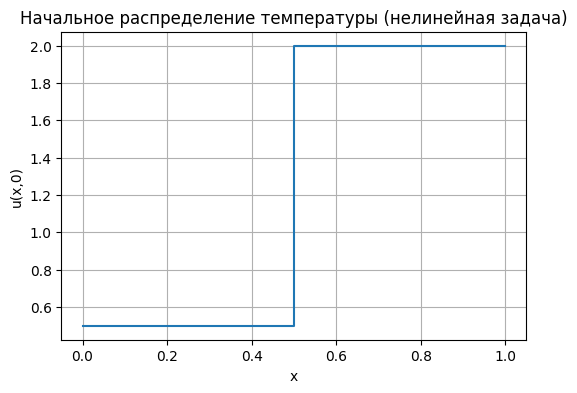

In [21]:
def u0_nonlinear(x):
    x = np.asarray(x)
    return np.where(x < l1, mu, nu)

xs_plot = np.linspace(0.0, l, 201)
u_init = u0_nonlinear(xs_plot)

plt.figure(figsize=(6, 4))
plt.step(xs_plot, u_init, where="post")
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.title("Начальное распределение температуры (нелинейная задача)")
plt.grid(True)
plt.show()

## 2. Модельная задача с постоянным коэффициентом теплопроводности

Модельная (линейная) задача получается, если заменить $k(u)$ константой $a$:

$$
u_t = 2 u_{xx}, \quad 0 < x < 1,\ t>0,
$$

с теми же граничными условиями

$$
u_x(0,t) = 0, \qquad u(1,t) = v,
$$

и специальным начальным условием

$$
u(x,0) = v + X_1(x),
$$

где $v = \nu$ и $X_1(x)$ — первая собственная функция для задачи

$$
X'' + \lambda^2 X = 0, \quad X'(0) = 0, \quad X(1) = 0.
$$

Отсюда берём

$$
\lambda_1 = \frac{\pi}{2}, \qquad X_1(x) = \cos \frac{\pi x}{2}.
$$

Решение модельной задачи:

$$
u(x,t) = v + X_1(x)\, e^{-2 \lambda_1^2 t}.
$$

Критерий выравнивания температуры в модельной задаче:

$$
\delta(t) = \frac{\max_x u(x,t) - \min_x u(x,t)}{\min_x u(x,t)}.
$$

На отрезке $[0,1]$ функция $\cos(\pi x/2)$ изменяется от $1$ до $0$, поэтому

$$
\max_x u = v + e^{-2 \lambda_1^2 t}, \qquad \min_x u = v,
$$

и

$$
\delta(t) = \frac{e^{-2 \lambda_1^2 t}}{v}.
$$

Для $v = 2$ получаем

$$
\delta(t) = \frac{1}{2} e^{-2 \lambda_1^2 t}.
$$

Из условия $\delta(T) \le 0.05$:

$$
\frac{1}{2} e^{-2 \lambda_1^2 T} \le 0.05
\quad \Rightarrow \quad
e^{-2 \lambda_1^2 T} \le 0.1
\quad \Rightarrow \quad
T \ge \frac{2 \ln 10}{\pi^2}.
$$

Обозначим это аналитическое время как $T_{\text{analytic}}$.

In [22]:
v = nu  # уровень температуры в модельной задаче

lambda1 = np.pi / 2.0

def X1(x):
    return np.cos(lambda1 * x)

def u_linear_analytic(x, t):
    x = np.asarray(x)
    return v + X1(x) * np.exp(-2.0 * lambda1**2 * t)

def delta_linear_analytic(t):
    max_u = v + np.exp(-2.0 * lambda1**2 * t)
    min_u = v
    return (max_u - min_u) / min_u

eps = 0.05
T_analytic = (2.0 * np.log(10.0)) / (np.pi**2)
print("Аналитическое время выравнивания T_analytic ≈", T_analytic)

ts = np.linspace(0.0, T_analytic, 5)
for t in ts:
    print(f"delta(t={t:.3f}) = {delta_linear_analytic(t):.4f}")

Аналитическое время выравнивания T_analytic ≈ 0.46660129411871826
delta(t=0.000) = 0.5000
delta(t=0.117) = 0.2812
delta(t=0.233) = 0.1581
delta(t=0.350) = 0.0889
delta(t=0.467) = 0.0500


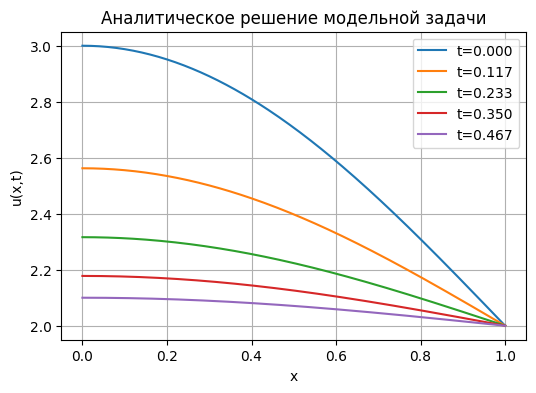

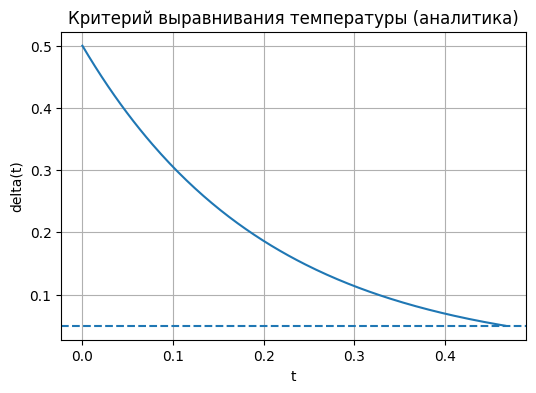

In [23]:
xs = np.linspace(0.0, l, 201)
times_an = [0.0, 0.25 * T_analytic, 0.5 * T_analytic, 0.75 * T_analytic, T_analytic]

plt.figure(figsize=(6, 4))
for t in times_an:
    plt.plot(xs, u_linear_analytic(xs, t), label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Аналитическое решение модельной задачи")
plt.legend()
plt.grid(True)
plt.show()

ts_fine = np.linspace(0.0, T_analytic, 200)
deltas_an = delta_linear_analytic(ts_fine)

plt.figure(figsize=(6, 4))
plt.plot(ts_fine, deltas_an)
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Критерий выравнивания температуры (аналитика)")
plt.grid(True)
plt.show()

## 3. Численное решение модельной задачи

Используем равномерную сетку по $x$ и явную разностную схему для уравнения

$$
u_t = 2 u_{xx}.
$$

Пусть $x_i = i h$, $i = 0,\dots,N$, $t^n = n \tau$. Тогда схема для внутренних узлов

$$
u_i^{n+1} = u_i^n + r\,(u_{i+1}^n - 2 u_i^n + u_{i-1}^n),
\quad r = \frac{\kappa_{\text{linear}} \tau}{h^2}.
$$

Границы:

* $u_x(0,t) = 0 \Rightarrow u_0^n = u_1^n$,
* $u(1,t) = v \Rightarrow u_N^n = v$.

Критерий выравнивания тот же:

$$
\delta^n = \frac{\max_i u_i^n - \min_i u_i^n}{\min_i u_i^n} \le 0.05.
$$

In [24]:
def solve_linear_model(nx=101, dt=None, t_max=2.0, v=v, store_every=100):
    x = np.linspace(0.0, l, nx)
    h = x[1] - x[0]
    if dt is None:
        dt = 0.25 * h**2 / kappa_linear
    r = kappa_linear * dt / h**2
    print(f"nx={nx}, h={h:.4e}, dt={dt:.4e}, r={r:.4e}")

    u = v + X1(x)

    times = [0.0]
    snapshots = [u.copy()]
    deltas = [(u.max() - u.min()) / u.min()]

    t = 0.0
    step = 0
    while t < t_max:
        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + r * (u[2:] - 2.0 * u[1:-1] + u[:-2])
        u_new[0] = u_new[1]
        u_new[-1] = v

        u = u_new
        t += dt
        step += 1

        if step % store_every == 0:
            times.append(t)
            snapshots.append(u.copy())
            delta = (u.max() - u.min()) / u.min()
            deltas.append(delta)
            if delta <= eps:
                break

    times = np.array(times)
    snapshots = np.array(snapshots)
    deltas = np.array(deltas)
    T_num = times[-1]
    print(f"Численное время выравнивания (линейная модель): T_num ≈ {T_num}")
    return x, times, snapshots, deltas

nx=101, h=1.0000e-02, dt=1.2500e-05, r=2.5000e-01
Численное время выравнивания (линейная модель): T_num ≈ 0.46250000000042296


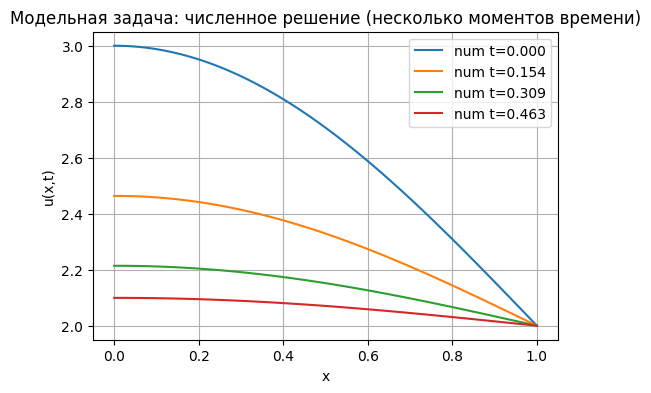

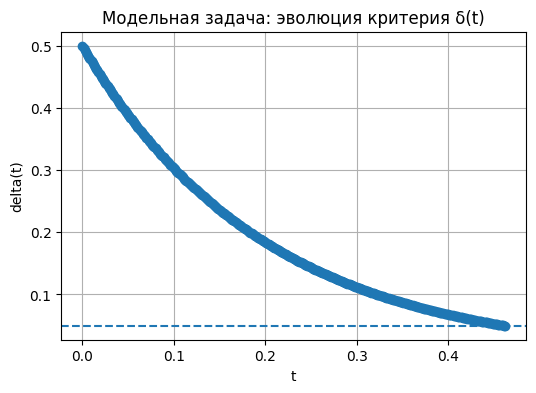

T_analytic = 0.46660129411871826
T_num_linear = 0.46250000000042296


In [25]:
x_lin, t_lin, U_lin, delta_lin = solve_linear_model()

plt.figure(figsize=(6, 4))
indices = [0, len(t_lin)//3, 2 * len(t_lin)//3, len(t_lin) - 1]
indices = sorted(set(indices))
for k in indices:
    t = t_lin[k]
    plt.plot(x_lin, U_lin[k], label=f"num t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Модельная задача: численное решение (несколько моментов времени)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_lin, delta_lin, marker="o")
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Модельная задача: эволюция критерия δ(t)")
plt.grid(True)
plt.show()

print("T_analytic =", T_analytic)
print("T_num_linear =", t_lin[-1])

## 4. Численное решение исходной нелинейной задачи

Теперь решаем исходное уравнение

$$
u_t = 2\,\partial_x \big((1+u)\,u_x\big)
$$

с разрывным начальным условием и теми же граничными условиями.

Используем потоковую форму:

$$
q = (1+u)\,u_x, \qquad u_t = 2 q_x.
$$

На равномерной сетке

$$
q_{i+1/2} = k_{i+1/2} \frac{u_{i+1} - u_i}{h}, \quad
k_{i+1/2} = 1 + \frac{u_{i+1} + u_i}{2},
$$

а дивергенция потока в узле

$$
(q_x)_i \approx \frac{q_{i+1/2} - q_{i-1/2}}{h}.
$$

Границы:

* $u_x(0,t) = 0 \Rightarrow u_0^n = u_1^n$,
* $u(1,t) = 0.5 \Rightarrow u_N^n = \mu$.

Используем явную схему по времени и тот же критерий выравнивания $\delta^n \le 0.05$.

In [26]:
def solve_nonlinear(nx=101, dt=None, t_max=2.0, store_every=100):
    x = np.linspace(0.0, l, nx)
    h = x[1] - x[0]
    if dt is None:
        k_max = 1.0 + max(mu, nu)
        kappa_eff = 2.0 * k_max
        dt = 0.25 * h**2 / kappa_eff
    print(f"nx={nx}, h={h:.4e}, dt={dt:.4e}")

    u = u0_nonlinear(x)

    times = [0.0]
    snapshots = [u.copy()]
    deltas = [(u.max() - u.min()) / u.min()]

    t = 0.0
    step = 0
    while t < t_max:
        # граничные условия на старом слое
        u[0] = u[1]
        u[-1] = mu

        k_right = 1.0 + 0.5 * (u[1:] + u[:-1])
        flux_right = k_right * (u[1:] - u[:-1]) / h

        div = np.zeros_like(u)
        div[1:-1] = (flux_right[1:] - flux_right[:-1]) / h

        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + 2.0 * dt * div[1:-1]
        u_new[0] = u_new[1]
        u_new[-1] = mu

        u = u_new
        t += dt
        step += 1

        if step % store_every == 0:
            times.append(t)
            snapshots.append(u.copy())
            delta = (u.max() - u.min()) / u.min()
            deltas.append(delta)
            if delta <= eps:
                break

    times = np.array(times)
    snapshots = np.array(snapshots)
    deltas = np.array(deltas)
    T_num = times[-1]
    print(f"Численное время выравнивания (нелинейная задача): T_num ≈ {T_num}")
    return x, times, snapshots, deltas

nx=101, h=1.0000e-02, dt=4.1667e-06
Численное время выравнивания (нелинейная задача): T_num ≈ 0.39958333333428697


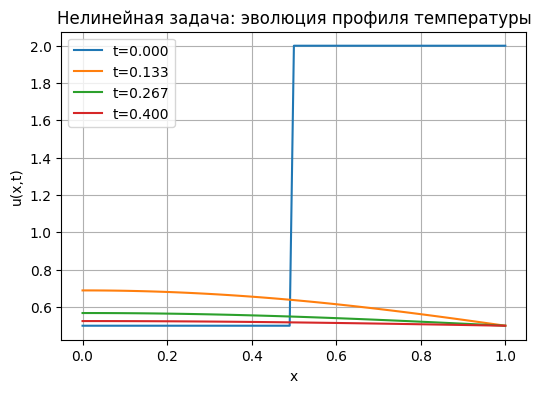

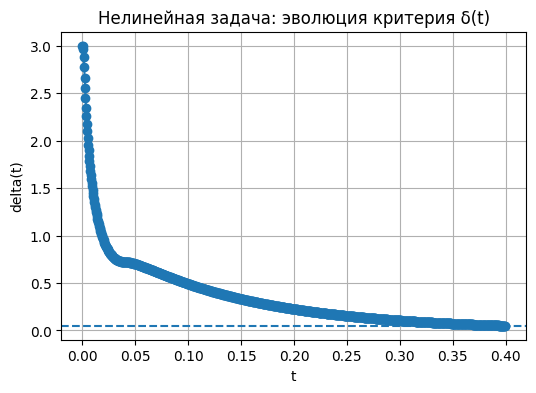

T_nonlin = 0.39958333333428697


In [27]:
x_non, t_non, U_non, delta_non = solve_nonlinear(t_max=2.0)

plt.figure(figsize=(6, 4))
indices_non = [0, len(t_non)//3, 2 * len(t_non)//3, len(t_non) - 1]
indices_non = sorted(set(indices_non))
for k in indices_non:
    t = t_non[k]
    plt.plot(x_non, U_non[k], label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Нелинейная задача: эволюция профиля температуры")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_non, delta_non, marker="o")
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Нелинейная задача: эволюция критерия δ(t)")
plt.grid(True)
plt.show()

T_nonlin = t_non[-1]
print("T_nonlin =", T_nonlin)

## 4\*. Нелинейная схема с итерациями Пикара и двойными индексами

Рассматриваем задачу

$$
u_t = 2\,\partial_x\big((1+u)\,u_x\big), \qquad 0 < x < 1,
$$

с граничными условиями

$$
u_x(0,t) = 0, \qquad u(1,t) = \mu = 0.5,
$$

и разрывным начальным условием

$$
u(x,0) =
\begin{cases}
\mu, & 0 \le x < 0.5,\\
\nu, & 0.5 \le x \le 1,
\end{cases}
\qquad \mu = 0.5,\ \nu = 2.
$$

### Сетка и обозначения

* Пространственная сетка:
  $$
  x_i = i h,\quad i = 0,1,\dots,N,\quad h = \frac{l}{N}.
  $$
* Временная сетка:
  $$
  t^n = n\tau,\quad n = 0,1,2,\dots
  $$
* Значение решения:
  $$
  u_i^{n,s} \approx u(x_i, t^n)
  $$
  — **двойной индекс**:
  * $i$ — номер узла по пространству,
  * $n$ — номер слоя по времени,
  * $s$ — номер итерации Пикара на слое $t^n$.

Начальное приближение на слое:
$$
u_i^{0,0} = u(x_i,0).
$$

### Коэффициенты на полуузлах

Коэффициент теплопроводности зависит от температуры:
$$
k(u) = 1 + u.
$$

На полуузлах $x_{i+1/2} = x_i + \tfrac{h}{2}$ на $s$-й итерации на слое $t^n$ задаём
$$
k_{i+1/2}^{n,s} = 1 + \frac{u_i^{n,s} + u_{i+1}^{n,s}}{2}.
$$

### Разностное уравнение (Пикар)

Ищем $u_i^{n+1,s+1}$ из неявной схемы с «замороженным» коэффициентом
$k^{n,s}$. Для внутренних узлов $i = 1,\dots,N-1$:

$$
\frac{u_i^{n+1,s+1} - u_i^n}{\tau}
=
\frac{2}{h^2}
\Bigl[
k_{i+1/2}^{n,s}\bigl(u_{i+1}^{n+1,s+1} - u_i^{n+1,s+1}\bigr)
-
k_{i-1/2}^{n,s}\bigl(u_i^{n+1,s+1} - u_{i-1}^{n+1,s+1}\bigr)
\Bigr].
$$

Здесь $u_i^n$ — известный слой по времени, а
$u_i^{n+1,s+1}$ — неизвестный слой $t^{n+1}$ на следующей итерации Пикара.

### Граничные условия в сетке

* Neumann в нуле:
  $$
  u_x(0,t)=0 \;\Rightarrow\; u_0^{n+1,s+1} = u_1^{n+1,s+1}.
  $$
* Dirichlet справа:
  $$
  u(1,t)=\mu \;\Rightarrow\; u_N^{n+1,s+1} = \mu.
  $$

Узел $i=N$ не входит в систему, а учитывается в правой части уравнения для
узла $i=N-1$.

### Итерации Пикара на каждом временном слое

1. На слое $t^n$ задаём начальное приближение
   $$
   u_i^{n,0} = u_i^n.
   $$

2. Для $s = 0,1,2,\dots$ последовательно:
   1. считаем коэффициенты $k_{i\pm 1/2}^{n,s} = k(u^{n,s})$;
   2. решаем линейную трёхдиагональную систему для $u_i^{n+1,s+1}$
      из приведённого выше разностного уравнения;
   3. проверяем сходимость
      $$
      \max_i \bigl|u_i^{n+1,s+1} - u_i^{n+1,s}\bigr|
      < \varepsilon_{\text{inner}}.
      $$
      При выполнении условия полагаем
      $$
      u_i^{n+1} = u_i^{n+1,s+1}
      $$
      и переходим к следующему слою по времени $t^{n+2}$.

Таким образом, на каждом слое времени $t^n$ мы итерационно считаем
$k_{i+1/2}^{n,s}$ через $u_i^{n,s}$ и затем $u_i^{n+1,s+1}$ через
эти коэффициенты, то есть учитываем зависимость коэффициента
$k(u)$ от температуры.


nx=101, h=1.0000e-02, dt=1.0000e-03
Численное время выравнивания (Пикар, нелинейная задача): T ≈ 0.401


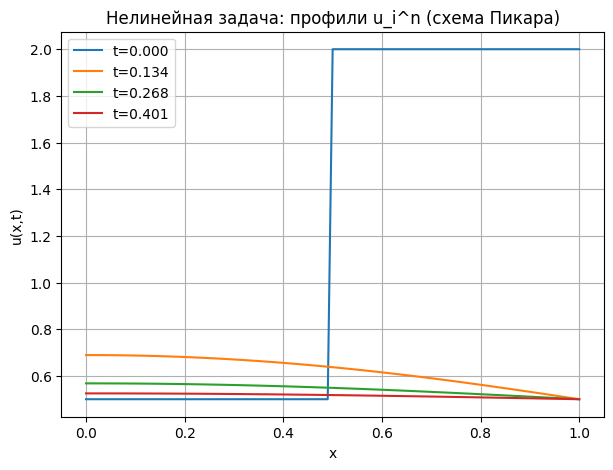

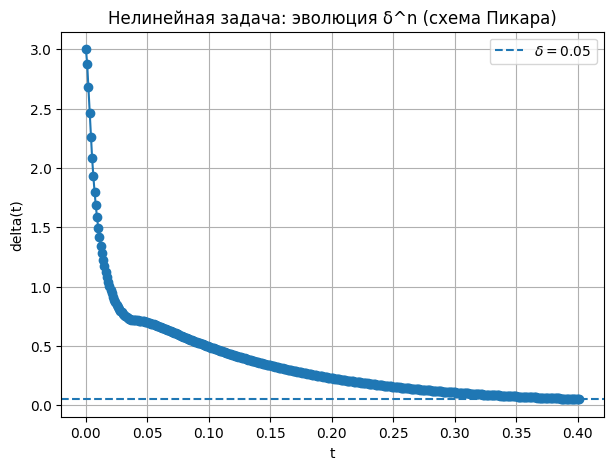

In [32]:
# 4*. Нелинейная задача: схема Пикара с двумя индексами (i по x, n по времени)

import numpy as np
import matplotlib.pyplot as plt

# Параметры варианта (на случай, если выше не заданы)
l = 1.0
l1 = 0.5
mu = 0.5
nu = 2.0

# критерий выравнивания из задачи
eps = 0.05

def u0_nonlinear(x):
    """Разрывное начальное условие: слева mu, справа nu."""
    x = np.asarray(x)
    return np.where(x < l1, mu, nu)

def solve_tridiagonal(a, b, c, d):
    """
    Решает трёхдиагональную СЛАУ:
        a[i] * x_{i-1} + b[i] * x_i + c[i] * x_{i+1} = d[i],
    длины: a,b,c,d имеют размер n, при этом a[0] и c[-1] не используются.
    """
    n = len(d)
    ac = a.copy().astype(float)
    bc = b.copy().astype(float)
    cc = c.copy().astype(float)
    dc = d.copy().astype(float)

    # прямой ход
    for i in range(1, n):
        w = ac[i] / bc[i - 1]
        bc[i] -= w * cc[i - 1]
        dc[i] -= w * dc[i - 1]

    x = np.zeros_like(dc)
    x[-1] = dc[-1] / bc[-1]

    # обратный ход
    for i in range(n - 2, -1, -1):
        x[i] = (dc[i] - cc[i] * x[i + 1]) / bc[i]
    return x

def solve_nonlinear_picard(
    nx=101,
    dt=None,
    t_max=0.5,
    store_every=1,
    max_iter=8,
    tol=1e-6,
    eps=0.05,
):
    """
    Неявная схема с итерациями Пикара для
        u_t = 2 * d_x ((1+u) u_x).

    Нотация в коде:
        u_n  ~ u_i^n   (вектор по i для фиксированного слоя n),
        u_old ~ u_i^{n,s},
        u_inner ~ u_i^{n+1,s+1}.
    """
    x = np.linspace(0.0, l, nx)
    h = x[1] - x[0]

    # Для неявной схемы шаг по времени можно взять относительно крупным
    if dt is None:
        dt = 1e-3
    print(f"nx={nx}, h={h:.4e}, dt={dt:.4e}")

    # начальное условие: u_i^{0,0}
    u = u0_nonlinear(x)  # это u_i^0

    times = [0.0]
    snapshots = [u.copy()]
    deltas = [(u.max() - u.min()) / u.min()]

    t = 0.0
    step = 0
    N = nx - 1        # последний индекс i = N
    M = nx - 2        # число внутренних узлов i = 1..N-1

    while t < t_max:
        # u_n = u_i^n (фиксированный слой по времени)
        u_n = u.copy()

        # начальное приближение Пикара: u_i^{n,0} = u_i^n
        u_old = u_n.copy()

        # --- Итерации Пикара по s ---
        for s in range(max_iter):
            # u_guess ≈ u_i^{n,s}
            u_guess = u_old.copy()

            # Граничные условия на текущем приближении:
            # u_0^{n,s} = u_1^{n,s}, u_N^{n,s} = mu
            u_guess[0] = u_guess[1]
            u_guess[N] = mu

            # Коэффициенты k_{i±1/2}^{n,s} = 1 + (u_i^{n,s} + u_{i±1}^{n,s})/2
            k_right = np.zeros(nx)    # k_{i+1/2}^{n,s}
            k_left  = np.zeros(nx)    # k_{i-1/2}^{n,s}

            for i in range(1, N + 1):
                if i <= N - 1:  # интерфейс i+1/2
                    k_right[i] = 1.0 + 0.5 * (u_guess[i] + u_guess[i + 1])
                if i >= 1:      # интерфейс i-1/2
                    k_left[i] = 1.0 + 0.5 * (u_guess[i] + u_guess[i - 1])

            # Neumann слева: поток через грань 1/2 равен 0 -> k_{1/2} не используется
            k_left[1] = 0.0

            alpha = 2.0 * dt / h**2 * k_left
            beta  = 2.0 * dt / h**2 * k_right

            # Формируем трёхдиагональную систему для узлов i = 1..N-1
            a = np.zeros(M)
            b = np.zeros(M)
            c = np.zeros(M)
            d = np.zeros(M)

            # i = 1 (j = 0)
            i = 1
            j = 0
            b[j] = 1.0 + beta[i]
            c[j] = -beta[i]
            d[j] = u_n[i]

            # внутренние узлы: i = 2..N-2 (j = i-1)
            for i in range(2, N - 1):
                j = i - 1
                a[j] = -alpha[i]
                b[j] = 1.0 + alpha[i] + beta[i]
                c[j] = -beta[i]
                d[j] = u_n[i]

            # правый внутренний узел: i = N-1 (j = M-1)
            i = N - 1
            j = M - 1
            a[j] = -alpha[i]
            b[j] = 1.0 + alpha[i] + beta[i]
            # вклад от граничного u_N^{n+1,s+1} = mu переносим в правую часть
            d[j] = u_n[i] + beta[i] * mu

            # Решаем систему и собираем u_i^{n+1,s+1}
            u_inner = u_n.copy()
            u_inner[1:N] = solve_tridiagonal(a, b, c, d)
            u_inner[0] = u_inner[1]
            u_inner[N] = mu

            # Проверка сходимости Пикара по s:
            if np.max(np.abs(u_inner - u_old)) < tol:
                u_old = u_inner
                break

            u_old = u_inner

        # После сходимости u_old ≈ u_i^{n+1}
        u = u_old
        t += dt
        step += 1

        if step % store_every == 0:
            times.append(t)
            snapshots.append(u.copy())
            delta = (u.max() - u.min()) / u.min()
            deltas.append(delta)
            if delta <= eps:
                break

    times = np.array(times)
    snapshots = np.array(snapshots)
    deltas = np.array(deltas)
    print(f"Численное время выравнивания (Пикар, нелинейная задача): T ≈ {times[-1]:.3f}")
    return x, times, snapshots, deltas

# --- Запуск схемы Пикара и графики ---

x_pic, t_pic, U_pic, delta_pic = solve_nonlinear_picard(eps=eps)

# Профили u_i^{n,s} (точнее u_i^n после сходимости Пикара) в нескольких моментах времени
plt.figure(figsize=(7, 5))
indices = [0, len(t_pic)//3, 2*len(t_pic)//3, len(t_pic)-1]
indices = sorted(set(indices))
for k in indices:
    plt.plot(x_pic, U_pic[k], label=f"t={t_pic[k]:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Нелинейная задача: профили u_i^n (схема Пикара)")
plt.grid(True)
plt.legend()
plt.show()

# Эволюция δ^n
plt.figure(figsize=(7, 5))
plt.plot(t_pic, delta_pic, marker="o")
plt.axhline(eps, linestyle="--", label=r"$\delta = 0.05$")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Нелинейная задача: эволюция δ^n (схема Пикара)")
plt.grid(True)
plt.legend()
plt.show()


## 5. Сравнение модельной и исходной задач

Сравним распределения температуры по стержню в момент выравнивания и времена выравнивания
для трёх случаев:

1. Аналитическое решение модельной задачи.
2. Численное решение модельной задачи.
3. Численное решение исходной нелинейной задачи.

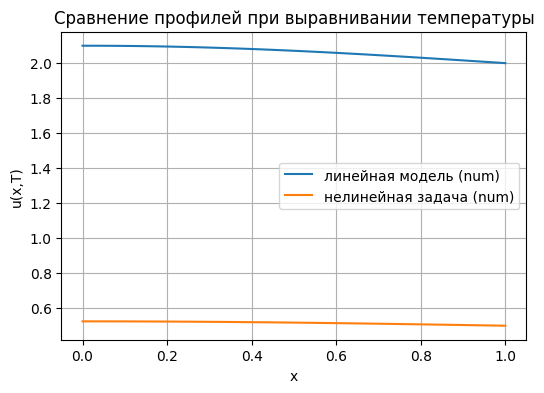

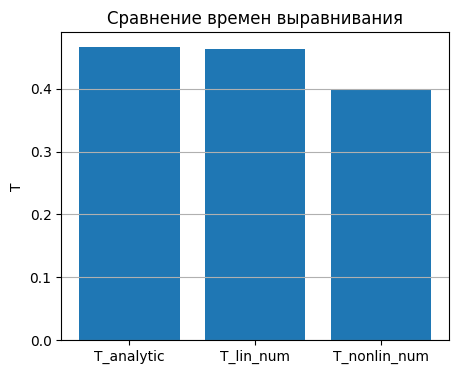

{'T_analytic': 0.46660129411871826, 'T_lin_num': 0.46250000000042296, 'T_nonlin': 0.39958333333428697}


In [28]:
plt.figure(figsize=(6, 4))
plt.plot(x_lin, U_lin[-1], label="линейная модель (num)")
plt.plot(x_non, U_non[-1], label="нелинейная задача (num)")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.title("Сравнение профилей при выравнивании температуры")
plt.legend()
plt.grid(True)
plt.show()

labels = ["T_analytic", "T_lin_num", "T_nonlin_num"]
values = [T_analytic, t_lin[-1], T_nonlin]

plt.figure(figsize=(5, 4))
plt.bar(labels, values)
plt.ylabel("T")
plt.title("Сравнение времен выравнивания")
plt.grid(axis="y")
plt.show()

print({
    "T_analytic": float(T_analytic),
    "T_lin_num": float(t_lin[-1]),
    "T_nonlin": float(T_nonlin),
})

## 4*. Нелинейная схема с итерациями Пикара

Для исходной задачи

$$
u_t = 2\,\partial_x\big((1+u)\,u_x\big), \qquad 0 < x < 1,
$$

при граничных условиях

$$
u_x(0,t) = 0, \qquad u(1,t) = \mu = 0.5,
$$

коэффициент теплопроводности зависит от температуры:

$$
k(u) = 1 + u.
$$

Поэтому при переходе со слоя $t^n$ на слой $t^{n+1}$ мы используем
**итерации Пикара** (метод замороженного коэффициента):

1. Пусть $u_i^n \approx u(x_i,t^n)$. Ищем новый слой $u^{n+1}$ как
   предел последовательности приближений $u^{(m)}$, $m=0,1,\dots$,
   начиная с
   $
   u_i^{(0)} = u_i^n.
   $

2. На итерации $m$ считаем коэффициент теплопроводности по текущему
   приближению:
   $
   k_{i+1/2}^{(m)} = 1 + \frac{u_i^{(m)} + u_{i+1}^{(m)}}{2}.
   $

3. Строим **неявную линейную разностную схему** для $u^{(m+1)}$ с
   «замороженным» коэффициентом $k^{(m)}$. В потоковой форме

   $
   q_{i+1/2}^{(m+1)} =
   k_{i+1/2}^{(m)} \frac{u_{i+1}^{(m+1)} - u_i^{(m+1)}}{h},
   $

   $
   (q_x)_i^{(m+1)} \approx
   \frac{q_{i+1/2}^{(m+1)} - q_{i-1/2}^{(m+1)}}{h},
   $

   а шаг по времени задаётся неявной схемой

   $
   u_i^{(m+1)} - u_i^n = 2 \tau (q_x)_i^{(m+1)}.
   $

   После подстановки потоков получаем для внутренних узлов трёхдиагональную
   систему вида

   $
   -\alpha_i^{(m)} u_{i-1}^{(m+1)} +
   \bigl(1 + \alpha_i^{(m)} + \beta_i^{(m)}\bigr) u_i^{(m+1)} -
   \beta_i^{(m)} u_{i+1}^{(m+1)} = u_i^n,
   $

   где

   $
   \alpha_i^{(m)} = \frac{2\tau}{h^2} k_{i-1/2}^{(m)}, \qquad
   \beta_i^{(m)}  = \frac{2\tau}{h^2} k_{i+1/2}^{(m)}.
   $

   Граничные условия учитываются так:

   * $u_x(0,t)=0 \Rightarrow u_0^{(m+1)} = u_1^{(m+1)}$ и поток через грань
     $x=\tfrac{h}{2}$ равен нулю ($\alpha_1^{(m)} = 0$);
   * $u(1,t)=\mu \Rightarrow u_N^{(m+1)} = \mu$ — этот узел входит в правую
     часть уравнения для $i=N-1$.

   Полученная трёхдиагональная система по узлам $i=1,\dots,N-1$ решается
   методом прогонки.

4. Итерации Пикара повторяются до сходимости:

   $
   \max_i |u_i^{(m+1)} - u_i^{(m)}|
   < \varepsilon_{\text{inner}},
   $

   после чего полагаем $u_i^{n+1} = u_i^{(m+1)}$.

Таким образом на **каждом временном слое** мы последовательно считаем

$
u^{(m)} \;\Rightarrow\; k^{(m)} = k(u^{(m)}) \;\Rightarrow\;
u^{(m+1)},
$

то есть «считаем $k$ через $u$ и $u$ через $k$» до достижения
локальной сходимости.


## 6. Дополнительный график: аналитика vs численное решение модельной задачи

На этом графике для одних и тех же моментов времени $t$ одновременно изображены:

* численное решение линейной модельной задачи (сплошная линия);
* аналитическое решение для тех же $t$ (штриховая линия).

Так наглядно видно, что решения практически совпадают.

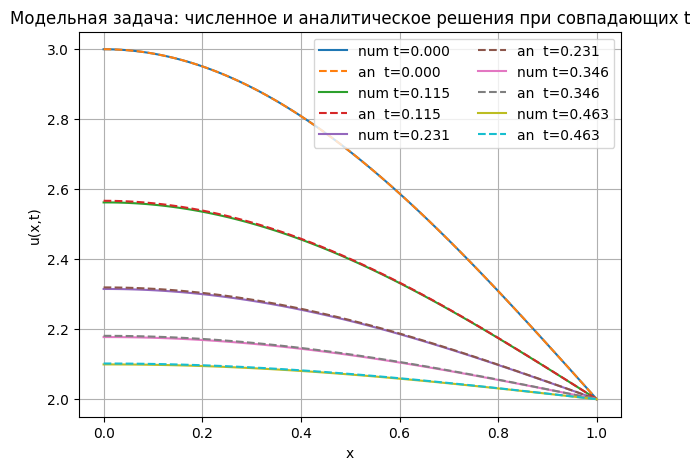

In [29]:
plt.figure(figsize=(7, 5))

indices_cmp = np.linspace(0, len(t_lin) - 1, 5, dtype=int)
indices_cmp = sorted(set(indices_cmp))

for k in indices_cmp:
    t = t_lin[k]
    u_num = U_lin[k]
    u_an = u_linear_analytic(x_lin, t)
    plt.plot(x_lin, u_num, label=f"num t={t:.3f}")
    plt.plot(x_lin, u_an, '--', label=f"an  t={t:.3f}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Модельная задача: численное и аналитическое решения при совпадающих t")
plt.grid(True)
plt.legend(ncol=2)
plt.show()

## 7. Дополнительные графики с несколькими моментами времени

В этих графиках добавлены по 5 характерных моментов времени и явно помечены
соответствующие точки на графиках $\delta(t)$, чтобы можно было сопоставить
эволюцию профилей и критерия выравнивания.

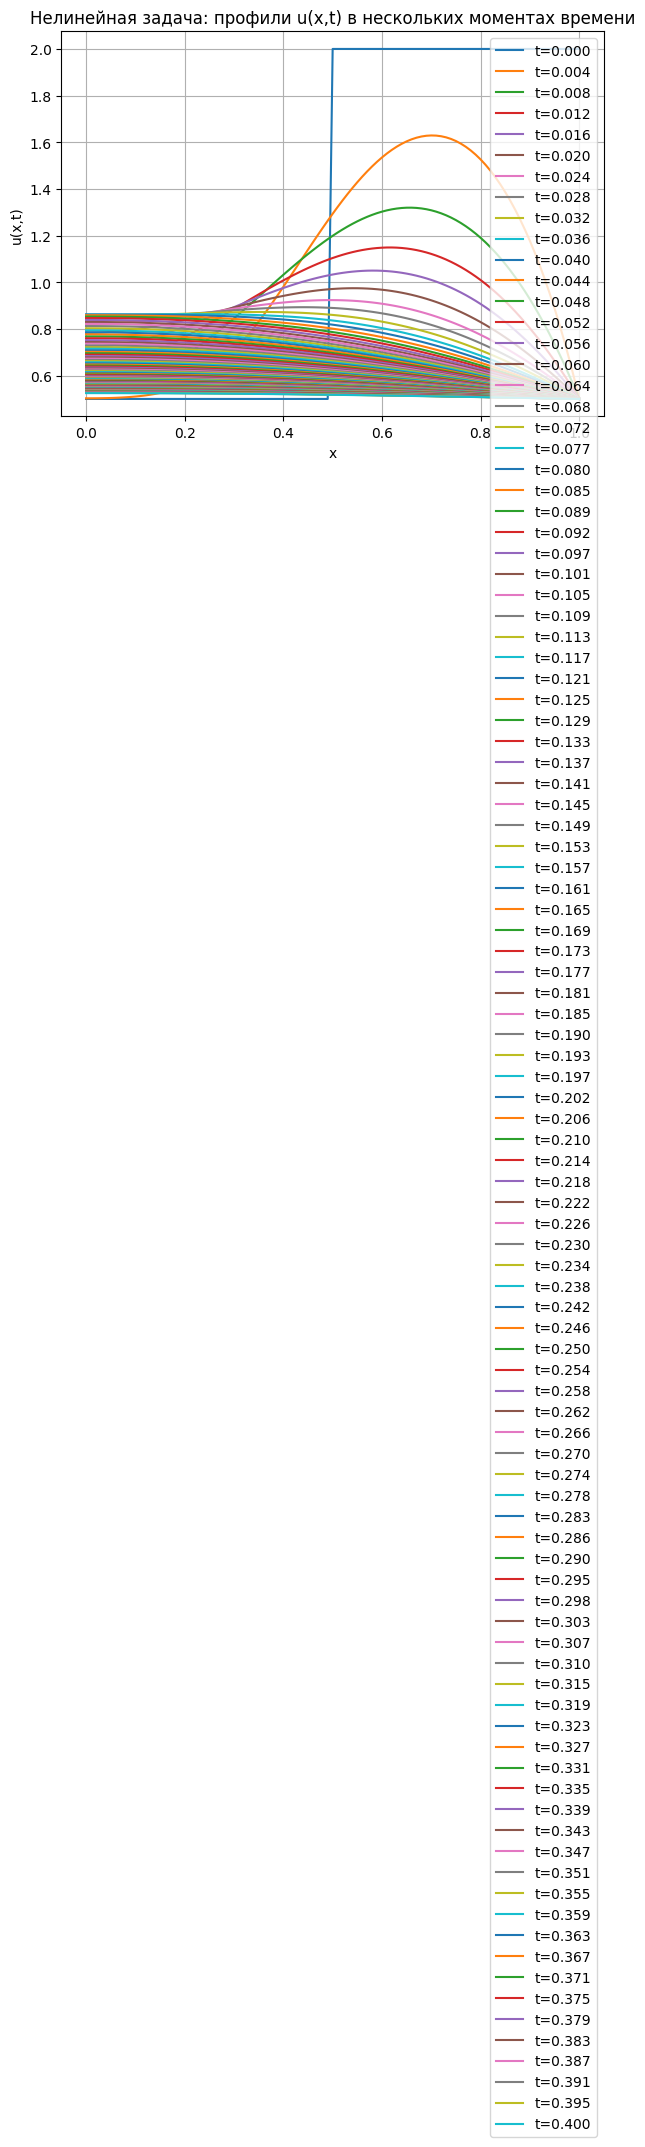

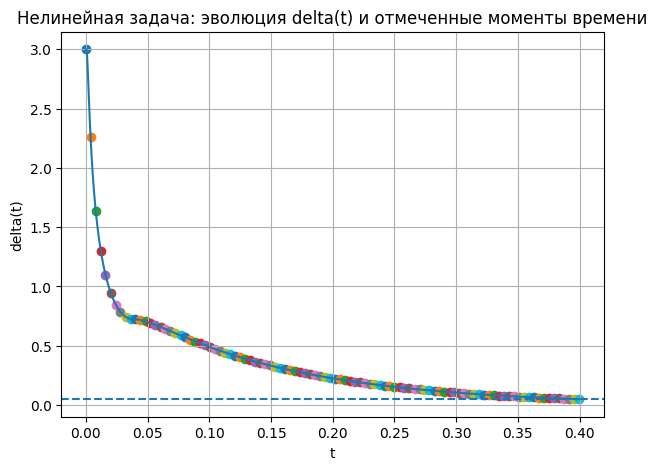

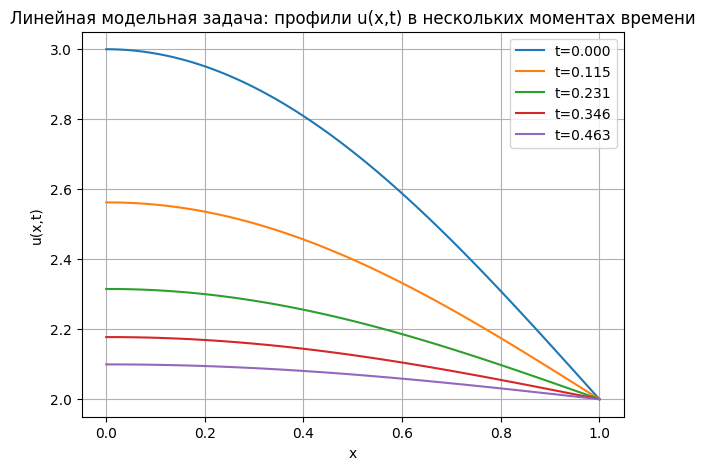

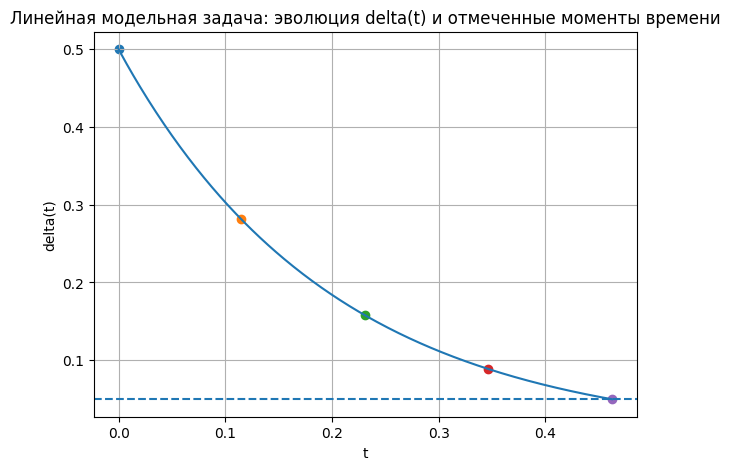

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# --- НЕЛИНЕЙНАЯ ЗАДАЧА: профили в 5 характерных моментах времени ---

num_snapshots_non = 100
indices_non2 = np.linspace(0, len(t_non) - 1, num_snapshots_non, dtype=int)
indices_non2 = sorted(set(indices_non2))

plt.figure(figsize=(7, 5))
for k in indices_non2:
    t = t_non[k]
    plt.plot(x_non, U_non[k], label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Нелинейная задача: профили u(x,t) в нескольких моментах времени")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(t_non, delta_non)
for k in indices_non2:
    plt.scatter(t_non[k], delta_non[k])
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Нелинейная задача: эволюция delta(t) и отмеченные моменты времени")
plt.grid(True)
plt.show()

# --- ЛИНЕЙНАЯ МОДЕЛЬНАЯ ЗАДАЧА: профили в 5 моментах времени ---

num_snapshots_lin = 5
indices_lin2 = np.linspace(0, len(t_lin) - 1, num_snapshots_lin, dtype=int)
indices_lin2 = sorted(set(indices_lin2))

plt.figure(figsize=(7, 5))
for k in indices_lin2:
    t = t_lin[k]
    plt.plot(x_lin, U_lin[k], label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Линейная модельная задача: профили u(x,t) в нескольких моментах времени")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(t_lin, delta_lin)
for k in indices_lin2:
    plt.scatter(t_lin[k], delta_lin[k])
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Линейная модельная задача: эволюция delta(t) и отмеченные моменты времени")
plt.grid(True)
plt.show()

## 8. Выводы

* Сформулирована исходная нелинейная краевая задача теплопроводности для стержня (вариант $m = 2, n = 2$).
* Для модельной задачи с постоянным коэффициентом теплопроводности получено аналитическое решение и найдено
  время выравнивания температуры $T_{\text{analytic}}$.
* Построено численное решение модельной задачи явной разностной схемой и показано согласие с аналитикой.
* Численно решена исходная нелинейная задача с разрывным начальным условием, найдено время выравнивания
  температуры и показана эволюция профилей температуры.
* Сравнены времена выравнивания и формы профилей для линейной модельной и нелинейной задач, что позволяет
  оценить влияние нелинейности коэффициента теплопроводности $k(u) = 1 + u$.